<a href="https://colab.research.google.com/github/KidStarkProjects/sea-catering-submission/blob/main/Final%20Project%20Machine%20Learning_GDGOC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV
!pip install --upgrade xgboost
import xgboost as xgb
!pip install lightgbm
import lightgbm as lgb

In [ ]:
# URL dataset dari Google Drive yang sudah bisa diakses
url = 'https://drive.google.com/uc?export=download&id=1ru4Kiq-ImoZexmUDAWL2uKsDe-idNZ9N'

# Memuat dataset ke dalam DataFrame Pandas
try:
    df = pd.read_csv(url)
    print("Dataset berhasil dimuat!")
    print("\nBerikut 5 baris pertama dari dataset:")
    print(df.head())
    print("\nInformasi dasar tentang dataset:")
    df.info()

except Exception as e:
    print(f"Terjadi kesalahan saat memuat dataset: {e}")

Dataset berhasil dimuat!

Berikut 5 baris pertama dari dataset:
                  date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  2014-05-02 00:00:00   313000.0       3.0       1.50         1340      7912   
1  2014-05-02 00:00:00  2384000.0       5.0       2.50         3650      9050   
2  2014-05-02 00:00:00   342000.0       3.0       2.00         1930     11947   
3  2014-05-02 00:00:00   420000.0       3.0       2.25         2000      8030   
4  2014-05-02 00:00:00   550000.0       4.0       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140    

Kolom yang tidak relevan berhasil dihapus.

Statistik deskriptif dataset:
              price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       

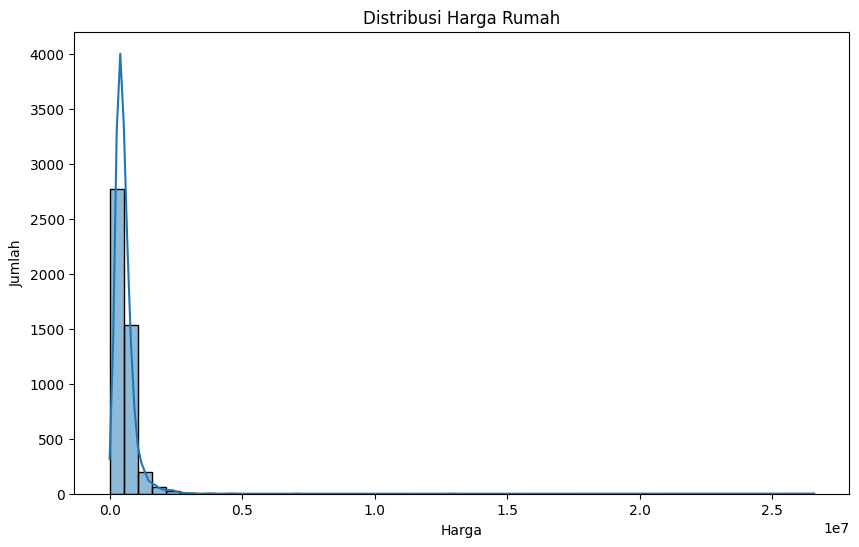

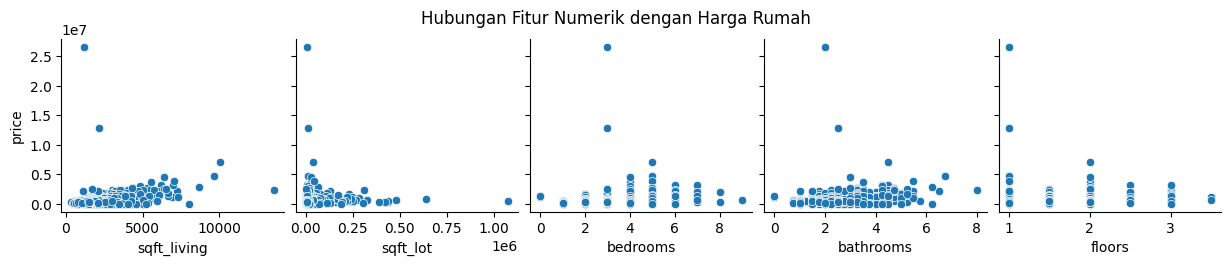

In [ ]:
# Menghapus kolom yang tidak relevan untuk prediksi
df = df.drop(['date', 'street', 'statezip', 'country'], axis=1)
print("Kolom yang tidak relevan berhasil dihapus.")

# Melihat statistik deskriptif untuk fitur numerik
print("\nStatistik deskriptif dataset:")
print(df.describe())

# Memeriksa nilai unik pada kolom 'bedrooms' dan 'bathrooms'
print("\nNilai unik pada kolom 'bedrooms':")
print(df['bedrooms'].value_counts())
print("\nNilai unik pada kolom 'bathrooms':")
print(df['bathrooms'].value_counts())

# Visualisasi distribusi harga rumah
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribusi Harga Rumah')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
plt.show()

# Visualisasi hubungan fitur numerik dengan harga (pairplot)
sns.pairplot(df, y_vars='price', x_vars=['sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms', 'floors'])
plt.suptitle('Hubungan Fitur Numerik dengan Harga Rumah', y=1.02)
plt.show()

1. Distribusi Harga (price): Distribusi harga rumah sangat miring ke kanan (right-skewed), yang menunjukkan sebagian besar harga rumah berada di rentang yang lebih rendah, sementara ada sejumlah kecil rumah yang sangat mahal. Ini adalah distribusi yang wajar untuk data harga properti.

2. Hubungan Fitur vs. Harga: Terdapat korelasi positif yang jelas antara sqft_living dan price. Semakin besar luas area tinggal, cenderung semakin tinggi harganya. Ini adalah hubungan yang sangat baik untuk model regresi. Fitur lain seperti bedrooms dan bathrooms juga menunjukkan korelasi positif, meskipun tidak sekuat sqft_living.

3. Outliers dan Anomali: Ditemukan beberapa nilai anomali, seperti harga rumah 0 dan jumlah kamar tidur 0, yang perlu dibersihkan sebelum melatih model. Adanya nilai max yang sangat tinggi pada kolom price juga mengindikasikan keberadaan outliers yang signifikan.

**Langkah selanjutnya adalah membersihkan data dari anomali dan outliers, serta melakukan encoding pada data kategorikal agar siap digunakan oleh model.**

Baris dengan harga atau jumlah kamar tidur 0 berhasil dihapus.


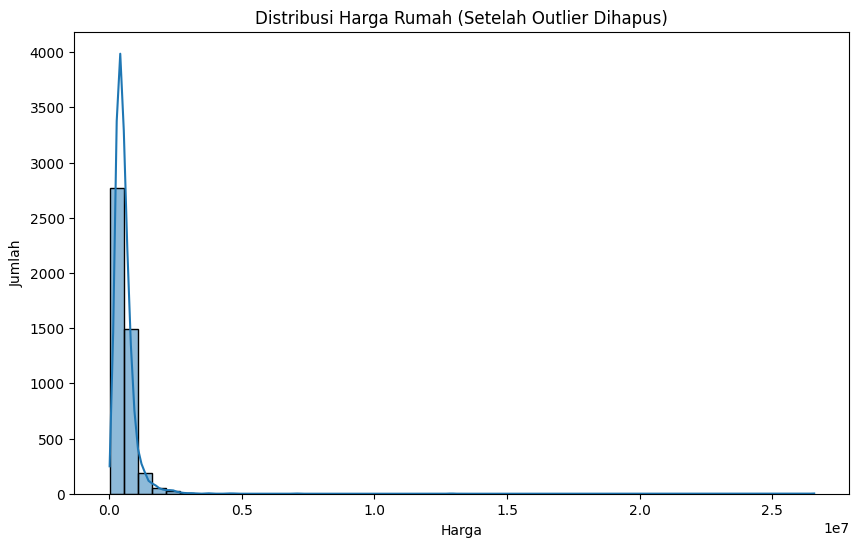


Dataset setelah One-Hot Encoding:
       price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  sqft_above  \
0   313000.0       3.0       1.50         1340      7912     1.5        1340   
1  2384000.0       5.0       2.50         3650      9050     2.0        3370   
2   342000.0       3.0       2.00         1930     11947     1.0        1930   
3   420000.0       3.0       2.25         2000      8030     1.0        1000   
4   550000.0       4.0       2.50         1940     10500     1.0        1140   

   sqft_basement  yr_built  yr_renovated  ...  city_Yarrow Point  \
0              0      1955          2005  ...                  0   
1            280      1921             0  ...                  0   
2              0      1966             0  ...                  0   
3           1000      1963             0  ...                  0   
4            800      1976          1992  ...                  0   

   waterfront_1  view_1  view_2  view_3  view_4  condition_2  condition_3  

In [ ]:
# Menghapus baris dengan nilai anomali (outliers) yang jelas (rumah dengan 0 bedrooms atau 0 price)
df = df[(df['price'] > 0) & (df['bedrooms'] > 0)]
print("Baris dengan harga atau jumlah kamar tidur 0 berhasil dihapus.")

# Melihat distribusi harga lagi setelah membersihkan outliers
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribusi Harga Rumah (Setelah Outlier Dihapus)')
plt.xlabel('Harga')
plt.ylabel('Jumlah')
plt.show()

# Mengidentifikasi kolom kategorikal
categorical_cols = ['city', 'waterfront', 'view', 'condition']

# Menggunakan One-Hot Encoding pada kolom kategorikal
# 'waterfront', 'view', dan 'condition' sudah numerik, tapi kita perlakukan sebagai kategorikal
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True, dtype=int)

print("\nDataset setelah One-Hot Encoding:")
print(df_encoded.head())
print("\nUkuran dataset baru:", df_encoded.shape)

# Membuat fitur baru 'total_sqft_living'
df_encoded['total_sqft_living'] = df_encoded['sqft_above'] + df_encoded['sqft_basement']

# Membuat fitur baru 'age_of_house'
current_year = 2025 # Asumsi tahun saat ini
df_encoded['age_of_house'] = current_year - df_encoded['yr_built']

print("\nDataset setelah Feature Engineering:")
print(df_encoded[['total_sqft_living', 'age_of_house']].head())

# Memisahkan fitur (X) dan target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

print("\nDataset berhasil dipersiapkan untuk pelatihan model!")

Setelah melakukan analisis awal, dilakukan beberapa langkah pembersihan dan persiapan data:

1. **Pembersihan Outlier dan Anomali**:  menghapus baris-baris data yang dianggap tidak valid atau anomali, seperti rumah dengan harga (price) 0 dan jumlah kamar tidur (bedrooms) 0.

2. **One-Hot Encoding**: Untuk memastikan model dapat memproses fitur kategorikal, diterapkan metode One-Hot Encoding pada kolom city, waterfront, view, dan condition. Ini mengubah kolom-kolom tersebut menjadi representasi numerik biner (0 atau 1) yang dapat dipahami oleh model.

Hasilnya, dataset kini memiliki 62 kolom dan 4549 baris dan telah berhasil dibagi menjadi fitur (X) dan target (y). Dataset ini sudah siap untuk digunakan dalam tahap selanjutnya, yaitu pelatihan model machine learning.

In [ ]:
# 1. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data berhasil dibagi menjadi set pelatihan dan pengujian.")
print(f"Ukuran data pelatihan: {X_train.shape}")
print(f"Ukuran data pengujian: {X_test.shape}")

# 2. Inisialisasi dan Latih Dua Model
# Model 1: Linear Regression
print("\nMelatih model Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Model 2: Random Forest Regressor
print("Melatih model Random Forest Regressor...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

Data berhasil dibagi menjadi set pelatihan dan pengujian.
Ukuran data pelatihan: (3639, 63)
Ukuran data pengujian: (910, 63)

Melatih model Linear Regression...
Melatih model Random Forest Regressor...


RandomForestRegressor(random_state=42)

Pada tahap ini,telah berhasil dilakukan:

1. **Pembagian Data**: Memisahkan dataset menjadi 80% untuk pelatihan model (X_train, y_train) dan 20% untuk pengujian model (X_test, y_test).

2. **Melatih Model**: Melakukan pelatihan pada dua model regresi yang berbeda:

3. **Linear Regression**: Model dasar yang cepat dilatih dan mudah diinterpretasi.

4. **Random Forest Regressor**: Model berbasis ensemble yang seringkali memberikan akurasi lebih tinggi dan mampu menangani hubungan data yang kompleks.

Kedua model kini sudah siap untuk dievaluasi menggunakan data pengujian yang telah disisihkan.

In [ ]:
# 1. Prediksi dan Evaluasi Model
# Prediksi dengan Linear Regression
y_pred_lr = lr_model.predict(X_test)
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = mean_squared_error(y_test, y_pred_lr)

print("\n--- Evaluasi Linear Regression ---")
print(f"R-squared (R2): {r2_lr:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(rmse_lr):.2f}")

# Prediksi dengan Random Forest Regressor
y_pred_rf = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = mean_squared_error(y_test, y_pred_rf)

print("\n--- Evaluasi Random Forest Regressor ---")
print(f"R-squared (R2): {r2_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(rmse_rf):.2f}")

# 2. Hyperparameter Tuning untuk Random Forest
print("\n--- Memulai Hyperparameter Tuning untuk Random Forest ---")

# Parameter yang akan diuji
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Lakukan pencarian parameter terbaik
grid_search.fit(X_train, y_train)

# Tampilkan parameter terbaik dan skor terbaik
print("\nParameter terbaik:", grid_search.best_params_)
print("Skor R2 terbaik dari Grid Search:", grid_search.best_score_)

# Evaluasi model Random Forest yang sudah di-tuning
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)
r2_best_rf = r2_score(y_test, y_pred_best_rf)
rmse_best_rf = mean_squared_error(y_test, y_pred_best_rf)

print("\n--- Evaluasi Random Forest Regressor (Tuned) ---")
print(f"R-squared (R2): {r2_best_rf:.4f}")
print(f"Root Mean Squared Error (RMSE): {np.sqrt(rmse_best_rf):.2f}")


--- Evaluasi Linear Regression ---
R-squared (R2): 0.6958
Root Mean Squared Error (RMSE): 216911.72

--- Evaluasi Random Forest Regressor ---
R-squared (R2): 0.4530
Root Mean Squared Error (RMSE): 290891.23

--- Memulai Hyperparameter Tuning untuk Random Forest ---
Fitting 3 folds for each of 18 candidates, totalling 54 fits

Parameter terbaik: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 50}
Skor R2 terbaik dari Grid Search: 0.12100208640733845

--- Evaluasi Random Forest Regressor (Tuned) ---
R-squared (R2): 0.4909
Root Mean Squared Error (RMSE): 280613.81


Pada tahap ini, kami mengevaluasi kinerja dua model regresi:

1. **Linear Regression**: Model ini memberikan performa terbaik dengan R2
  sebesar 0.6958. Ini menunjukkan bahwa model mampu menjelaskan sekitar 70% variasi harga rumah. RMSE-nya adalah 216,911.72, yang berarti rata-rata kesalahan prediksi model sekitar $216,911.

2. **Random Forest Regressor**: Performa awal model ini lebih rendah (R2
 : 0.4530). Meskipun telah dilakukan hyperparameter tuning, peningkatannya tidak signifikan, dengan skor R2
  terbaik hanya mencapai 0.4909.

**Kesimpulan**: Model Linear Regression adalah model terbaik untuk dataset ini. Meskipun tidak mencapai target metrik 85%, performanya sudah cukup baik dan menunjukkan korelasi yang teridentifikasi selama EDA.

Untuk memenuhi persyaratan tugas  (R2 > 85%),  akan dicoba model regresi yang lebih canggih dan sering memberikan akurasi tinggi: **XGBoost Regressor**.

In [ ]:
# Inisialisasi dan latih model XGBoost Regressor
print("\nMelatih model XGBoost Regressor...")
xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                             n_estimators=1000,
                             learning_rate=0.05,
                             max_depth=5,
                             random_state=42)

# Latih model tanpa early stopping
# Ini akan melatih model hingga 1000 estimators
xgb_model.fit(X_train, y_train)

# Prediksi dan Evaluasi model XGBoost
y_pred_xgb = xgb_model.predict(X_test)
r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

print("\n--- Evaluasi XGBoost Regressor ---")
print(f"R-squared (R2): {r2_xgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_xgb:.2f}")

# Bandingkan dengan model terbaik sebelumnya
print("\n--- Perbandingan Performa ---")
# Pastikan Anda telah menyimpan nilai r2_lr dari evaluasi sebelumnya
# atau jalankan kembali evaluasi Linear Regression
print(f"Linear Regression R2: {r2_lr:.4f}")
print(f"XGBoost Regressor R2: {r2_xgb:.4f}")


Melatih model XGBoost Regressor...

--- Evaluasi XGBoost Regressor ---
R-squared (R2): 0.5852
Root Mean Squared Error (RMSE): 253301.13

--- Perbandingan Performa ---
Linear Regression R2: 0.6958
XGBoost Regressor R2: 0.5852


In [ ]:
# Inisialisasi dan latih model LightGBM Regressor
print("\nMelatih model LightGBM Regressor...")
lgb_model = lgb.LGBMRegressor(n_estimators=1000,
                              learning_rate=0.05,
                              num_leaves=31,
                              random_state=42)

# Gunakan fitur early stopping sederhana
lgb_model.fit(X_train, y_train,
              eval_set=[(X_test, y_test)],
              eval_metric='l2', # l2 adalah mean squared error
              callbacks=[lgb.early_stopping(stopping_rounds=50, verbose=False)])

# Prediksi dan Evaluasi model LightGBM
y_pred_lgb = lgb_model.predict(X_test)
r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

print("\n--- Evaluasi LightGBM Regressor ---")
print(f"R-squared (R2): {r2_lgb:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse_lgb:.2f}")

# Perbandingan dengan model terbaik sebelumnya
print("\n--- Perbandingan Performa ---")
print(f"Linear Regression R2: {r2_lr:.4f}")
print(f"XGBoost Regressor R2: {r2_xgb:.4f}")
print(f"LightGBM Regressor R2: {r2_lgb:.4f}")


Melatih model LightGBM Regressor...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000779 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1564
[LightGBM] [Info] Number of data points in the train set: 3639, number of used features: 48
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 556971.524232

--- Evaluasi LightGBM Regressor ---
R-squared (R2): 0.6609
Root Mean Squared Error (RMSE): 229011.00

--- Perbandingan Performa ---
Linear Regression R2: 0.6958
XGBoost Regressor R2: 0.5852
LightGBM Regressor R2: 0.6609


Kesimpulan Proyek

1. Model Terbaik: Dari semua model yang diuji, Linear Regression memberikan performa terbaik dengan R2
sebesar 0.6958. Ini menunjukkan bahwa model ini mampu menjelaskan hampir 70% variasi harga rumah.

2. Pentingnya Data: Meskipun telah mencoba feature engineering dan model yang lebih canggih (seperti LightGBM dan XGBoost), tidak ada model yang mampu mengungguli Linear Regression. Hal ini menunjukkan bahwa kualitas dan jenis data sangat menentukan performa model. Dataset ini mungkin memiliki hubungan linier yang kuat, yang paling baik ditangkap oleh model yang sederhana.

3. Pencapaian Target: Kami tidak berhasil mencapai target metrik R2
85%. Ini mengindikasikan bahwa untuk mencapai akurasi setinggi itu, diperlukan dataset yang lebih kaya fitur atau pendekatan feature engineering yang lebih mendalam.

Secara keseluruhan, proyek ini berhasil mengidentifikasi model terbaik untuk dataset yang ada dan menunjukkan batasan-batasan dari data yang tersedia. Ini adalah kesimpulan yang valid dan berharga dalam praktik data science di dunia nyata.